In [1]:
%matplotlib notebook

<IPython.core.display.Javascript object>


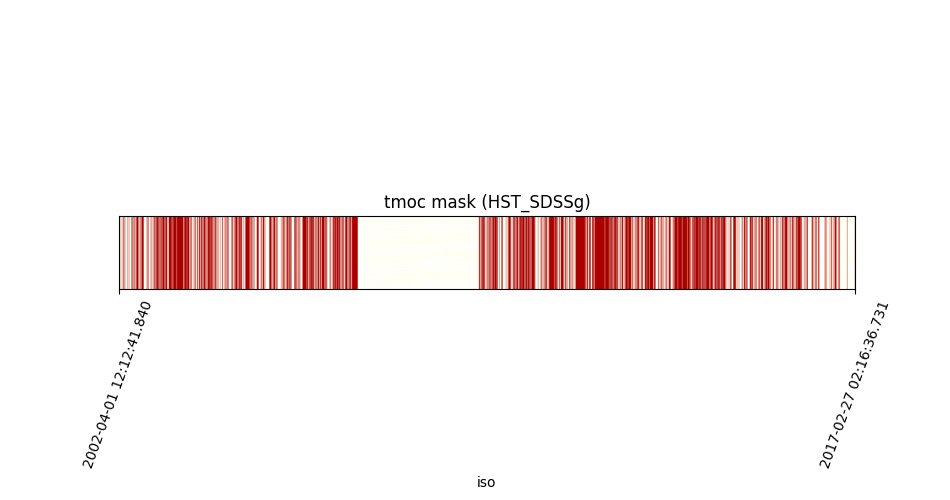

In [2]:
from mocpy import TimeMoc

time_moc = TimeMoc.from_moc_fits_file('notebooks/demo-data/TMOC/HST_SDSSg/TMoc.fits')
time_moc.plot(title='tmoc mask (HST_SDSSg)')

In [3]:
from astroquery.vizier import Vizier

viz = Vizier(columns=['*', '_RAJ2000', '_DEJ2000'])
viz.ROW_LIMIT = -1
table = viz.get_catalogs('II/285')[1]

print(table)

 Name  Ref      JD       Vmag  U-B  B-V    V-Rc  Rc-Ic  V-Ic 
                d        mag   mag  mag    mag    mag   mag  
------ --- ------------ ------ --- ------ ------ ----- ------
 T ANT 978 2443914.3750     --  --  0.802  0.391    --  0.856
 T ANT 978 2443915.4410     --  --  0.861  0.460    --  0.803
 T ANT 978 2444297.4250  9.360  --  0.791  0.431    --  0.840
 T ANT 978 2444298.4760  9.520  --  0.853  0.463    --  0.903
 T ANT 978 2444299.4940  9.720  --  0.927  0.484    --  0.953
 T ANT 978 2444300.4070  9.575  --  0.809  0.441    --  0.872
 T ANT 978 2444301.4180  8.881  --  0.499  0.309    --  0.608
 T ANT 978 2444302.4110  9.139  --  0.661  0.392    --  0.754
 T ANT 976 2451619.3105  9.738  --  0.910     --    --  0.959
 T ANT 976 2451619.3828     --  --     --     --    --  0.974
   ... ...          ...    ... ...    ...    ...   ...    ...
NN VUL 950 2445204.2187 14.102  --  1.372     --    --     --
NN VUL 950 2445205.2265 14.075  --  1.423     --    --     --
NN VUL 9

CPU times: user 1.54 s, sys: 0 ns, total: 1.54 s
Wall time: 1.55 s


<IPython.core.display.Javascript object>


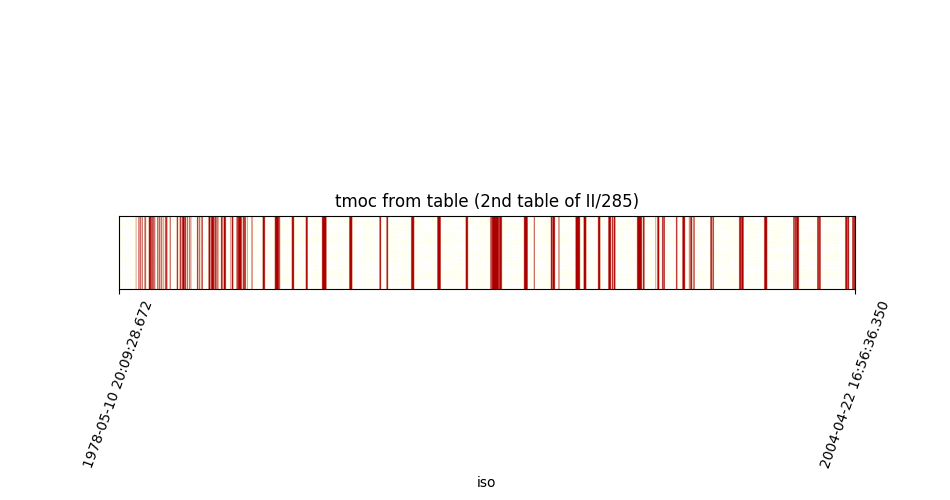

In [4]:
%time table_moc = TimeMoc.from_table(table, t_column='JD', format='jd')
table_moc.plot(title='tmoc from table (2nd table of II/285)')

In [5]:
# filtering the table through the tmoc loaded from file (e.g. time_moc)
from astropy.time import TimeDelta

time_moc = time_moc.degrade_to_order(15)
filtered_table = time_moc.filter_table(table=table,
                                      column_name='JD',
                                      format='jd',
                                      keep_inside=True,
                                      delta_t=TimeDelta(4**(29-16) / 1e6, format='sec', scale='tdb'))
print(time_moc.max_order)
print(filtered_table)

/home/baumann/mocpy/mocpy/tmoc.py:278: UserWarning: Requested time resolution filtering cannot be applied.
Filtering is applied with a time resolution of 268.435456 sec.
  warnings.warn(message, UserWarning)


15
 Name  Ref      JD       Vmag  U-B  B-V   V-Rc Rc-Ic  V-Ic 
                d        mag   mag  mag   mag   mag   mag  
------ --- ------------ ------ --- ------ ---- ----- ------
 T ANT 968 2452996.5048  9.154  --     --   --    --  0.782
 U CAR 969 2452660.3950  6.208  --     --   --    --  1.276
 V CAR 969 2452650.5189  7.297  --     --   --    --  0.933
 V CAR 968 2452996.4970  7.202  --     --   --    --  0.856
UX CAR 969 2452660.4561  8.429  --     --   --    --  0.818
UX CAR 968 2452996.5045  8.636  --     --   --    --  0.846
VY CAR 969 2452660.3934  7.952  --     --   --    --  1.357
WZ CAR 969 2452660.3939  8.686  --     --   --    --  1.039
XX CAR 969 2452660.3941  9.358  --     --   --    --  1.324
XZ CAR 969 2452660.3952  8.349  --     --   --    --  1.313
   ... ...          ...    ... ...    ...  ...   ...    ...
SV VEL 979 2452366.0897  8.253  --  0.977   --    --  1.138
SW VEL 969 2452650.5212  8.156  --     --   --    --  1.383
SW VEL 968 2452996.4996  7.821  --   

res :  9
fits tmoc :  11
table tmoc :  11


<IPython.core.display.Javascript object>


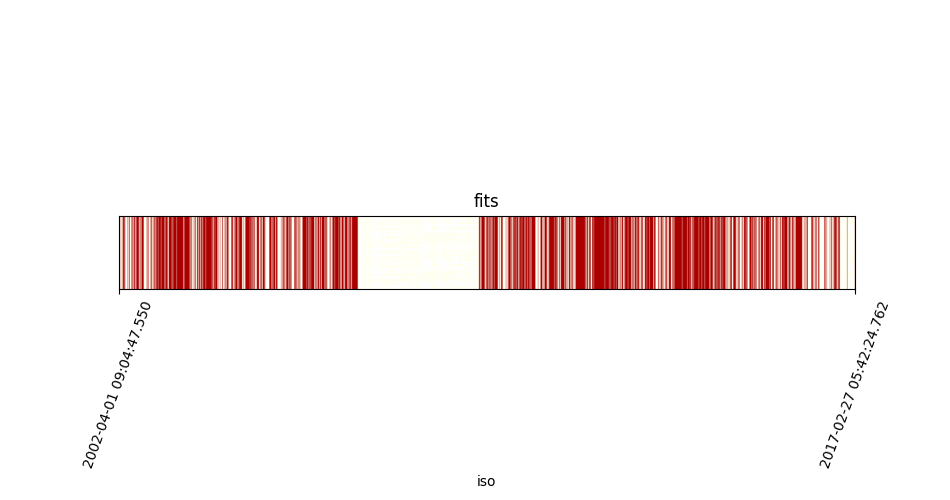

<IPython.core.display.Javascript object>


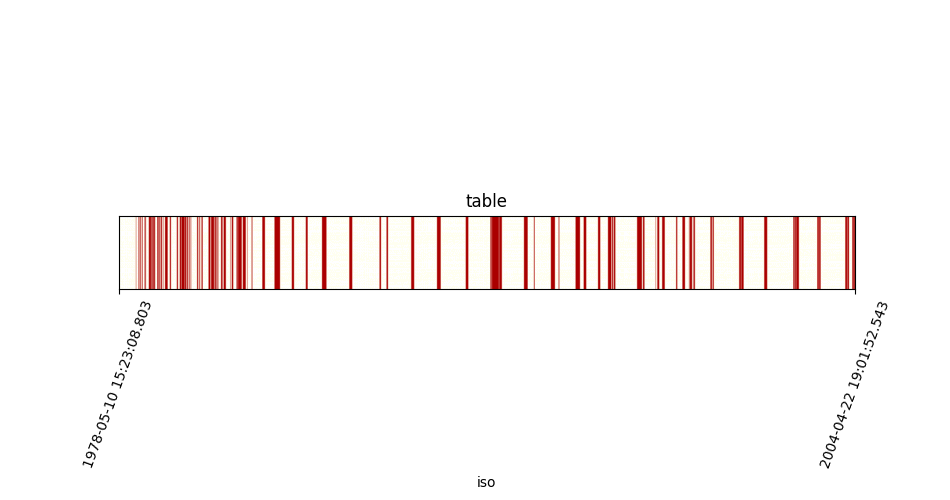

<IPython.core.display.Javascript object>


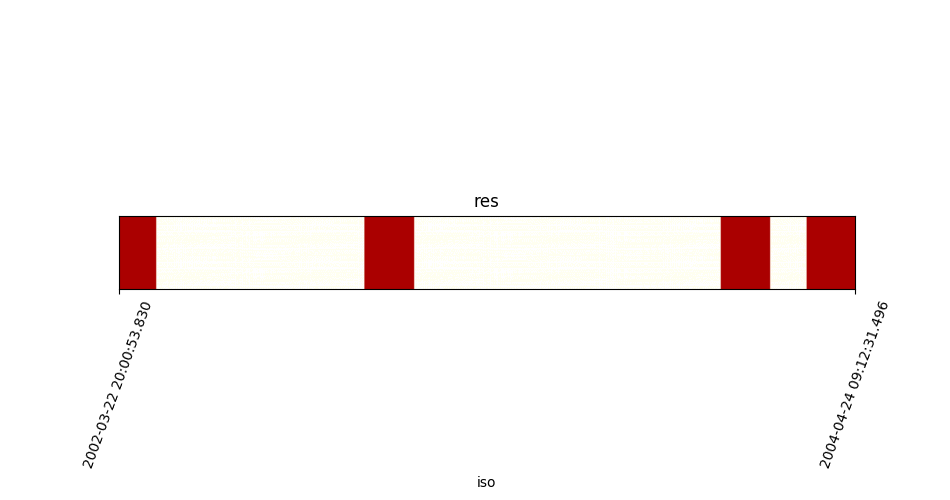

In [13]:

table_moc = table_moc.degrade_to_order(11)
time_moc = time_moc.degrade_to_order(11)
res = table_moc.intersection(time_moc, delta_t=TimeMoc.order_to_time_resolution(9))
print('res : ', res.max_order)
print('fits tmoc : ', time_moc.max_order)
print('table tmoc : ', table_moc.max_order)


time_moc.plot(title='fits')
table_moc.plot(title='table')
res.plot(title='res')

<IPython.core.display.Javascript object>


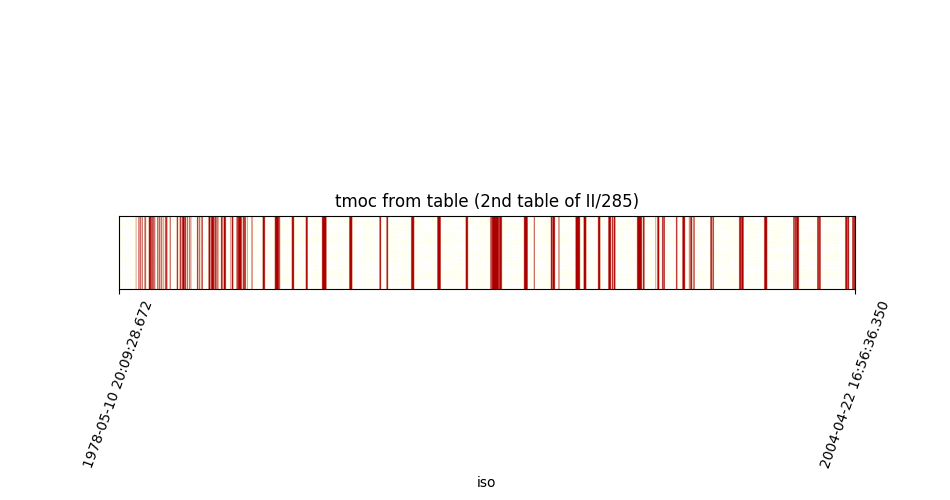

<IPython.core.display.Javascript object>


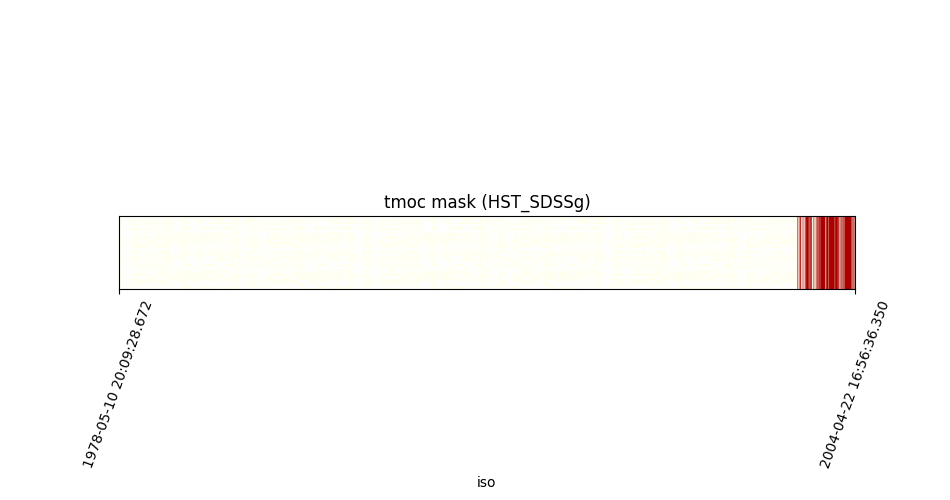

<IPython.core.display.Javascript object>


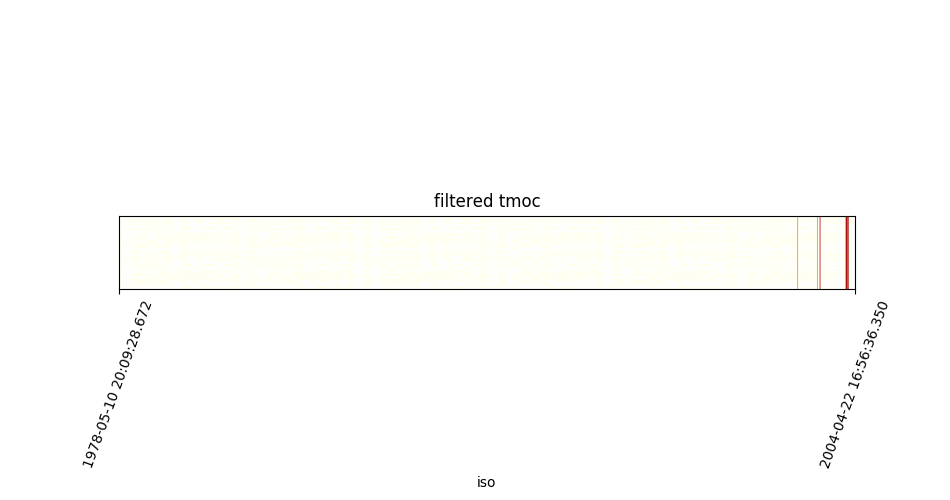

14

In [28]:
# Creation of a time moc from the filtered table. We can compare it to the original time moc created from the table
filtered_moc = TimeMoc.from_table(filtered_table, t_column='JD', format='jd')

# Plot the table tmoc
table_moc.plot(title='tmoc from table (2nd table of II/285)')
# Plot the tmoc mask with the window of the table moc
time_moc.plot(title='tmoc mask (HST_SDSSg)', view=(table_moc.min_time, table_moc.max_time))
# Plot the filtered moc
filtered_moc.plot(title='filtered tmoc', view=(table_moc.min_time, table_moc.max_time))

filtered_moc.max_order

<IPython.core.display.Javascript object>


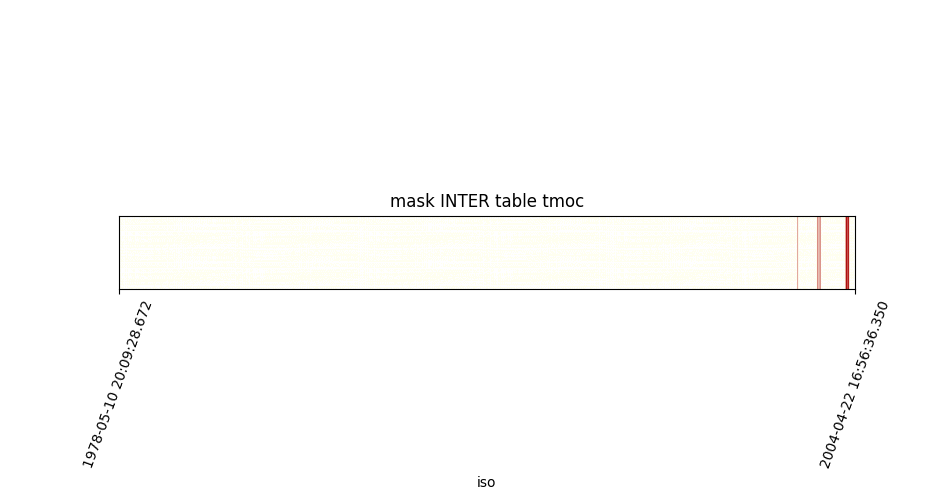

14


In [34]:
time_moc = time_moc.degrade_to_order(13)
intersect_tmoc = table_moc.intersection(time_moc)
intersect_tmoc.plot(title='mask INTER table tmoc', view=(table_moc.min_time, table_moc.max_time))
print(intersect_tmoc.max_order)

In [26]:
assert intersect_tmoc == filtered_moc

NameError: name 'intersect_tmoc' is not defined